#  第四讲 小世界网络【实践】一

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==3.0, matplotlib==3.5.3, numpy==1.24.2

## 1、K-近邻规则网络的生成与可视化

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 自己写一个规则网络的生成算法
def regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))  # 节点标签设置为0到n-1
    # 每个节点与周围k/2个邻近节点相连
    for j in range(1, k // 2 + 1):   # //是取整除 - 返回商的整数部分（向下取整）
        targets = nodes[j:] + nodes[0:j] 
        G.add_edges_from(zip(nodes, targets))
    return G

In [3]:
# zip函数的作用
a = [1,2,3,4]
b = [6,7,8,9]
list(zip(a,b))

[(1, 6), (2, 7), (3, 8), (4, 9)]

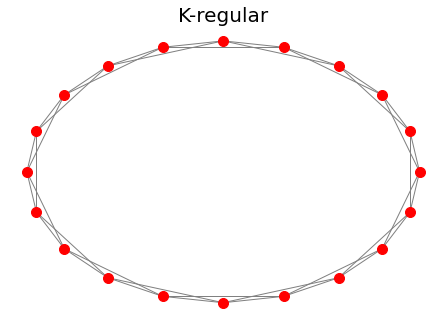

In [4]:
n = 20 # 网络节点总数
k = 4 # 近邻节点数
color_list = ['red','gray']

G = regular_graph(n, k)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("K-regular", fontsize=20)
plt.savefig("K-regular.png", dpi=600)

## 2、WS小世界网络的生成与可视化

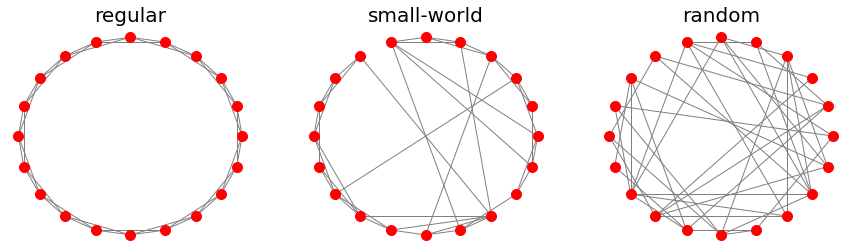

In [5]:
plt.figure(figsize=(15, 4))
# 绘制规则网络
p = 0
G1 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1, pos1, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("regular", fontsize=20)

# 绘制WS小世界
p=0.2
G2 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2, pos2, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("small-world", fontsize=20)


#绘制随机网络
p=1.0
G3 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3, pos3, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("random", fontsize=20)
plt.savefig("WS.png", dpi=600)

## 3、NW小世界网络的生成与可视化

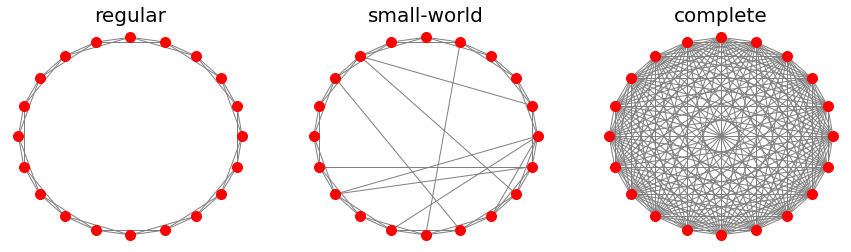

In [6]:
plt.figure(figsize=(15, 4))
# 绘制规则网络
p = 0
G1 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1, pos1, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("regular", fontsize=20)

# 绘制NW小世界
p=0.2
G2 = nx.newman_watts_strogatz_graph(n, k, p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2, pos2, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("small-world", fontsize=20)


#绘制完全网络：加边概率为1
G3 = nx.complete_graph(n)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3, pos3, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("complete", fontsize=20)
plt.savefig("NW.png", dpi=600)

## 4、WS小世界网络的度分布

In [7]:
import numpy as np

In [8]:
# 定义求度分布的函数
def get_pdf(G, k):
    N = len(G.nodes())
    
    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1     
        Pk.append(c/N)  
    
    return Pk


In [9]:
# 以N＝1000，K＝6的WS模型的数值模拟结果为例
N = 1000
K = 6
samples = 100  # 统计平均次数
p_rew = [0.1,0.2,0.4,0.6,1.0]

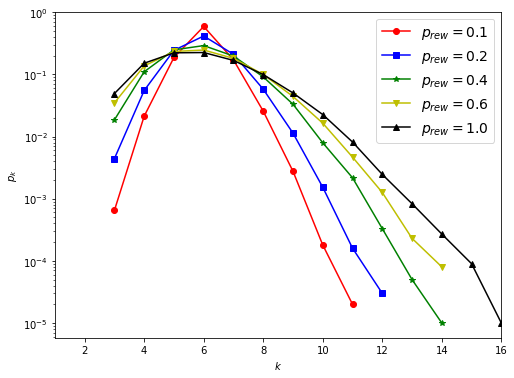

In [10]:
plt.figure(figsize=(8,6))
symbols = ["ro-","bs-","g*-","yv-","k^-"]
# 为了便于统计平均，指定区间[1,16]
kmin, kmax = 1, 16
x = list(range(kmin, kmax+1))
c = 0
for p in p_rew:
    s = np.zeros(kmax-kmin+1)
    for i in range(samples):
        G = nx.watts_strogatz_graph(N, K, p)
        y = get_pdf(G, x)
        s += np.array(y)

    
    s = list(s)
    # 剔除概率为零的点：这里也可以用numpy的函数直接剔除更方便一些
    new_x = []
    new_y = []
    for i in range(len(x)):
        if s[i] != 0:
            new_x.append(x[i])
            new_y.append(s[i])
            
    plt.plot(new_x, np.array(new_y)/samples, symbols[c], label='$p_{rew} = $'+str(p))
    c += 1

plt.legend(loc=0, fontsize=14)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.yscale("log")
plt.xlim([kmin, kmax])
plt.savefig("pdf_WS.png", dpi=600)

## 5、NW小世界网络的度分布（略，可以自己尝试一下）

## 6、WS小世界网络的“小世界”与“高集聚”特性

In [11]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 设置初始参数
N, K = 1000, 10
samples = 10
p_rew = np.logspace(0,4,15)/10000
p_rew

array([1.00000000e-04, 1.93069773e-04, 3.72759372e-04, 7.19685673e-04,
       1.38949549e-03, 2.68269580e-03, 5.17947468e-03, 1.00000000e-02,
       1.93069773e-02, 3.72759372e-02, 7.19685673e-02, 1.38949549e-01,
       2.68269580e-01, 5.17947468e-01, 1.00000000e+00])

In [14]:
# 平均距离与平均集聚系数
C = []
CT = [] # 理论近似值：{[3(K-2)]/[4(K-1)]}*(1-p)^3
L = []
sigma = []
for p in p_rew:
    s1 = 0
    s2 = 0
    s3 = 0
    for i in range(samples):
        # 为了防止在计算平均距离时报错：最好改用生成连通WS小世界网络函数connected_watts_strogatz_graph()
        G = nx.connected_watts_strogatz_graph(N, K, p, tries=100)
        G_random = nx.gnm_random_graph(N, N*K/2)
        while not nx.is_connected(G_random):
            G_random = nx.gnm_random_graph(N, N*K/2) 
        c = nx.average_clustering(G)
        cr = nx.average_clustering(G_random)
        l = nx.average_shortest_path_length(G)
        lr = nx.average_shortest_path_length(G_random)
        s1 += c
        s2 += l
        s3 += (c/cr)/(l/lr)
        
        
    ct = (3*(K-2)/(4*(K-1)))*((1-p)**3)
    CT.append(ct)
    C.append(s1/samples)
    L.append(s2/samples)
    sigma.append(s3/samples)

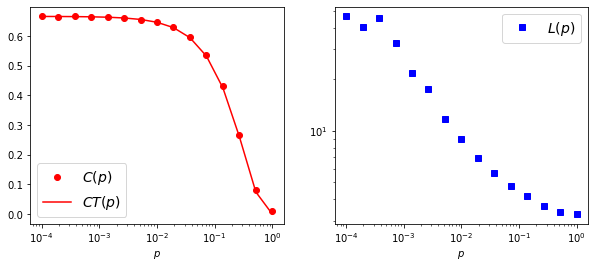

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(p_rew, C, 'ro', label='$C(p)$')
plt.plot(p_rew, CT, 'r-', label='$CT(p)$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")

plt.subplot(122)
plt.plot(p_rew, L, 'bs', label='$L(p)$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
plt.yscale("log")

In [16]:
# 初始规则网络的平均集聚系数和平均距离
G0 = nx.watts_strogatz_graph(N, K, 0)
C0 = nx.average_clustering(G0)
L0 = nx.average_shortest_path_length(G0)

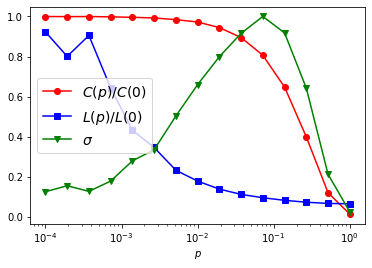

In [17]:
plt.figure(figsize=(6,4))
plt.plot(p_rew, np.array(C)/C0, 'ro-', label='$C(p)/C(0)$')
plt.plot(p_rew, np.array(L)/L0, 'bs-', label='$L(p)/L(0)$')
plt.plot(p_rew, np.array(sigma)/max(sigma), 'gv-', label=r'$\sigma$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
# plt.savefig("C_L2.png", dpi=600)

## 7、真实网络的集聚系数与度之间的依赖关系（以科学合作网络为例）

In [18]:
def C_vs_k(G):
    klist = [G.degree(i) for i in G.nodes()]
    # 计算每个节点的集聚系数
    all_C = {i: nx.clustering(G, i) for i in G.nodes()}
    all_k = list(set(klist))  # 所有可能的度值
    
    # 计算度值为k的节点的集聚系数的平均值
    C_k = {}
    for k in sorted(all_k):
        s = 0
        j = 0
        for i in G.nodes():
            if G.degree(i) == k:
                j = j + 1
                s = s + all_C[i]
        avc_k = s/j   
        C_k[k] = avc_k
    
    return C_k

In [ ]:
import pandas as pd
df = pd.read_csv("citation.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using = nx.Graph())
len(G.nodes())

In [ ]:
C_k = C_vs_k(G)
avC = nx.average_clustering(G)
print(avC)
x = np.linspace(1,10000,10000)
y = [avC]*10000

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(C_k.keys(), C_k.values(), 'ro')
plt.plot(x, y, 'b-')
plt.xlabel("$k$")
plt.ylabel("$C(k)$")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,1e4])
# plt.savefig("C(k)_k_citation.png", dpi=600)